# Decision tree algorithm

In [34]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix, precision_score, classification_report)
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [35]:
df = pd.read_csv('dev.csv')
#df = df.iloc[:, 4:]
df = df.drop_duplicates()
df = df.dropna()
df

,ID,Parent,Component,Line,Column,EndLine,EndColumn,CC,CCL,CCO,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,L725,L874,L103,44,1,223,2,0.082397,1,3,...,0,0,0,3,0,0,0,0,0,False
1,L7984,L8766,L103,10,1,43,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
2,L6110,L5338,L103,14,1,67,2,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,False
3,L7289,L6714,L103,13,1,59,2,0.543860,1,4,...,2,0,0,0,0,0,0,0,0,False
4,L4437,L8973,L103,9,1,34,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,L1602,L20362,L103,33,1,86,2,0.441441,1,1,...,0,0,0,3,0,0,0,0,0,False
71803,L771,L37692,L103,29,1,85,2,0.000000,0,0,...,1,2,0,1,0,0,0,0,0,False
71804,L30823,L30750,L103,308,87,313,18,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
71805,L50337,L50312,L103,118,111,128,10,1.000000,2,6,...,0,0,0,0,0,0,0,0,0,False


Split features and target

In [3]:
df_copy = df.copy()

# Features
X = df_copy.iloc[:,:-1]

# Targets
targets = [0 if (i == False) else 1 for i in df_copy.iloc[:,-1]]
y = pd.DataFrame({"bugs": targets})

Split data in train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Run the Decision tree model

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9039562727745966


In [7]:
precision_score(y_test, y_pred, average=None)

array([0.95097287, 0.24878523])

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14409
           1       0.25      0.27      0.26       959

    accuracy                           0.90     15368
   macro avg       0.60      0.61      0.60     15368
weighted avg       0.91      0.90      0.91     15368



In [9]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    #Prints the AUC scores for training and testing data and returns testing score
 
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)
    print(f'Training AUC: {auc_train} Testing AUC: {auc_test}')

    return y_test_score

In [10]:
result = get_auc_scores(clf, X_train, X_test, y_train, y_test)

Training AUC: 0.9997260765092479 Testing AUC: 0.6107992043265161


In [11]:
def plot_roc_curve(y_test, y_test_score):
    # Plot ROC curve for testing data

    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - (ROC)')
    plt.legend(loc='lower right')
    plt.show()

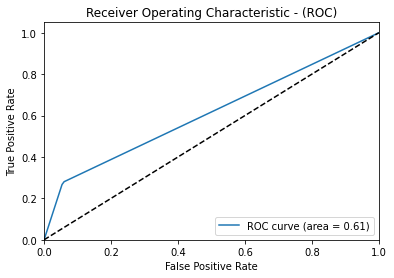

In [12]:
plot_roc_curve(y_test, result)

In [32]:
def show_cm(y_true, y_pred, class_names=None, model_name=None):
    #Show confusion matrix

    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title('Confusion Matrix: {}'.format(model_name))
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
    else:
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        
    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        class_names = set(y_true)
        print(class_names)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        
    thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j, i, cf[i, j],horizontalalignment='center',color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()

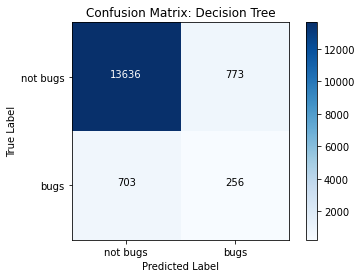

In [33]:
show_cm(y_test, y_pred, ["not bugs", "bugs"], "Decision Tree")